DataCamp Foundations of Probability Class

## Binomial Distribution

### A distribution is a mathematical function that describes the range of possible values of a random variable

In [9]:
# Generate 100 occurrences of flipping 10 coins, each with 30% probability
# rbinom(100, 10, .3)

In [25]:
# Probability 5 are heads
flips <- rbinom(100000, 10, .5)
# density calculated through simulation
mean(flips == 5) 
# Exact calculation long term expectation 
dbinom(5, 10, .5) 

[1] 0.24665

[1] 0.2460938

In [24]:
# Prob of 4 or less heads
# Simulation 
mean(flips <= 4) 
# Calculation approach
pbinom(4, 10, .5)

[1] 0.37739

[1] 0.3769531

In [29]:
# Calculate the probability that at least five coins are heads
1 - pbinom(4, 10, .3)

# Confirm your answer with a simulation of 10,000 trials
mean(rbinom(10000, 10, .3) >= 5) # Can increase # of trials to improve convergence

[1] 0.1502683

[1] 0.1471

In [31]:
# Expected Value & Variance
# How the distribution is centered & how spread out it is 
# Variance is the average squared distance between mean and a random draw
# EV in this case is mean
# In Binom Dist:
# EV = size * p
# var(X) = size * p * (1 - p)

In [33]:
#  expected value of a binomial distribution where 25 coins are flipped, each having a 30% chance of heads?
# EV Formula
25*.3
# EV simulation 
mean(rbinom(10000, 25, .3))

# Variance formula
25*.3*(1-.3)

# Variance simulation 
var(rbinom(10000, 25, .3))

[1] 7.5

[1] 7.5228

[1] 5.25

[1] 5.182306

## Basic Probability 

In [1]:
# AND
# PR(A and B) = P(A) * P(B) # Assuming Independence
# You've already simulated 100,000 flips of unfair coins A and B
A <- rbinom(100000, 1, .4)
B <- rbinom(100000, 1, .2)

# Simulate 100,000 flips of coin C (70% chance of heads)
C <- rbinom(100000, 1, .7)

# Estimate the probability A, B, and C are all heads
mean(A & B & C)

[1] 0.24879

In [ ]:
# AND
# PR(A or B) = P(A)+ P(B) - P(A) * P(B) # Assuming Independence
mean(A | B) # Simulation helps when things get more complicated with multiple coins

When multiplying by a scalar the EV is multiplied by the scalar and new Variance multiplied by scalar squared 

_Adding two random variables_

E[X + Y] = E[X] + E[Y] 
Var[X + Y] = Var[X] + Var[Y] 
Both assuming independence

## Bayesian Statistics

In [1]:
# Simulate 50000 cases of flipping 20 coins from fair and from biased
fair <- rbinom(50000, 20, .5)
biased <- rbinom(50000, 20, .75)

# How many fair cases, and how many biased, led to exactly 11 heads?
fair_11 <- sum(fair == 11)
biased_11 <- sum(biased ==11)

# Find the fraction of fair coins that are 11 out of all coins that were 11
fair_11 / (fair_11 + biased_11)

[1] 0.8576939

_*Including Prior Probability*_

In [ ]:
# Simulate 8000 cases of flipping a fair coin, and 2000 of a biased coin
fair_flips <- rbinom(8000, 20, .5)
biased_flips <-rbinom(2000, 20, .75)

# Find the number of cases from each coin that resulted in 14/20
fair_14   <- sum(fair_flips==14)
biased_14 <- sum(biased_flips==14)

# Use these to estimate the posterior probability
fair_14 / (fair_14 + biased_14)

*This can Generalize to more coins:*

In [ ]:
# Simulate 80,000 draws from fair coin, 10,000 from each of high and low coins
flips_fair <- rbinom(80000, 20, .5)
flips_high <- rbinom(10000, 20, .75)
flips_low <-  rbinom(10000, 20, .25)

# Compute the number of coins that resulted in 14 heads from each of these piles
fair_14 <- sum(flips_fair==14)
high_14 <- sum(flips_high==14)
low_14 <- sum(flips_low==14)

# Compute the posterior probability that the coin was fair
fair_14 / (fair_14 + high_14 + low_14)

*Bayes Theorem*:

Pr(fair|A) = Pr(A|fair)Pr(fair)Pr(A|fair)Pr(fair)+Pr(A|biased)Pr(biased)

In [1]:
# Prior of fair coin 99%, prior of biased is 1%
# Use dbinom to find the probability of 16/20 from a fair or biased coin
probability_16_fair <- dbinom(16, 20, .5) 
probability_16_biased <- dbinom(16, 20, .75) 

# Use Bayes' theorem to find the posterior probability that the coin is fair
probability_16_fair * .99 / (probability_16_fair*.99 + probability_16_biased * .01)

[1] 0.7068775

## Other Distributions

_Normal Distribution Approximates binom distribution with sufficient sample size_

In [8]:
library(ggplot2)
compare_histograms <- function(variable1, variable2) {
  x <- data.frame(value = variable1, variable = "Variable 1")
  y <- data.frame(value = variable2, variable = "Variable 2")
  ggplot(rbind(x, y), aes(value)) +
    geom_histogram() +
    facet_wrap(~ variable, nrow = 2)
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


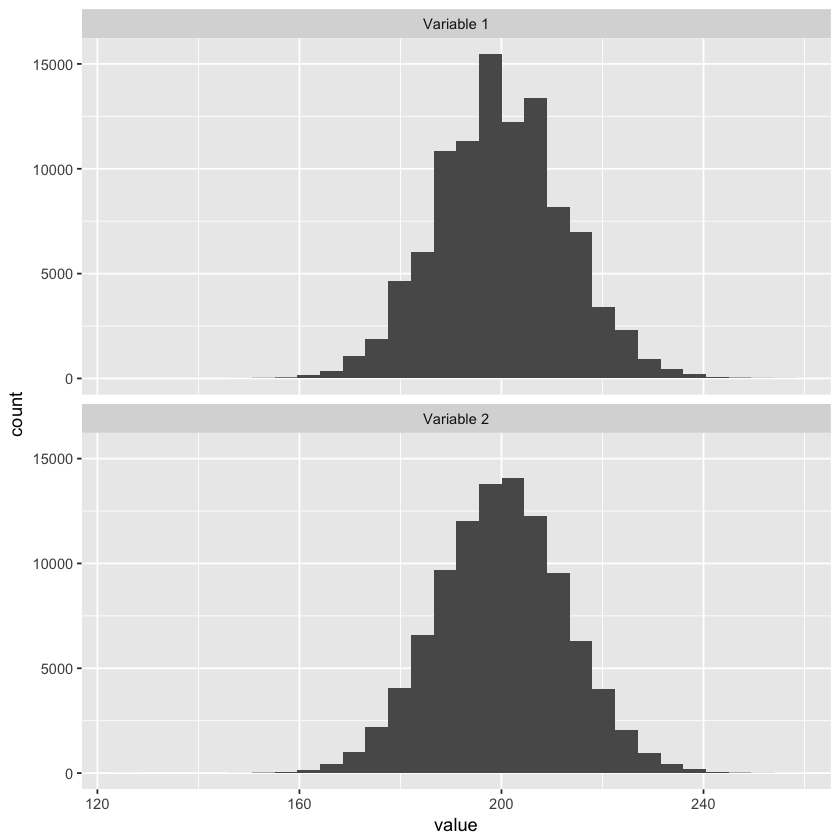

In [6]:
# Normal 
# Draw a random sample of 100,000 from the Binomial(1000, .2) distribution
binom_sample <- rbinom(100000, 1000, .2)

# Draw a random sample of 100,000 from the normal approximation
normal_sample <- rnorm(100000, 200, sqrt(160))

# Compare the two distributions with the compare_histograms function
compare_histograms(binom_sample, normal_sample)

In [7]:
# Simulations from the normal and binomial distributions
binom_sample <- rbinom(100000, 1000, .2)
normal_sample <- rnorm(100000, 200, sqrt(160))
# Use binom_sample to estimate the probability of <= 190 heads
mean(binom_sample <= 190)
# Use normal_sample to estimate the probability of <= 190 heads
mean(normal_sample <= 190)
# Calculate the probability of <= 190 heads with pbinom
pbinom(190, 1000, .2)
# Calculate the probability of <= 190 heads with pnorm
pnorm(190, 200, sqrt(160))


[1] 0.22842

[1] 0.21535

[1] 0.2273564

[1] 0.2145977

## Poisson distribution

Suppose now we set the probability of an occurance very low to simulate a rare event happening. I.E. hist(rbinom(100000, 1000, 1/1000))

This doesn't look like a bell curve because it can't be symetrical with < 0 heads. 

N is large and P is very small can be approximated with opisson distrubtion

Parameterized by just mean or lambda

rpois(100000, 1)

Variance is equal to the mean

They use this to to model rare events as counts

You care more about absolute count rather than fraction

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


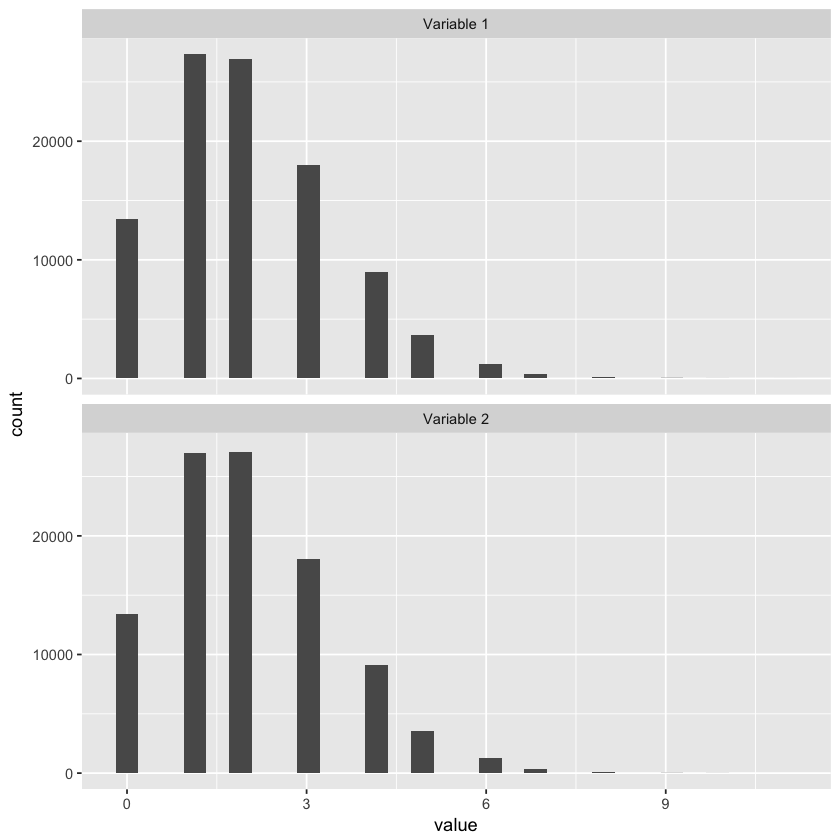

In [5]:
# Draw a random sample of 100,000 from the Binomial(1000, .002) distribution
binom_sample <- rbinom(100000, 1000, .002)

# Draw a random sample of 100,000 from the Poisson approximation
poisson_sample <- rpois(100000, 2)

# Compare the two distributions with the compare_histograms function
compare_histograms(binom_sample, poisson_sample)

Poission Dist's are additive 

*Geometric Distribution*

Waiting for a particular event with some probability

[1] 10

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


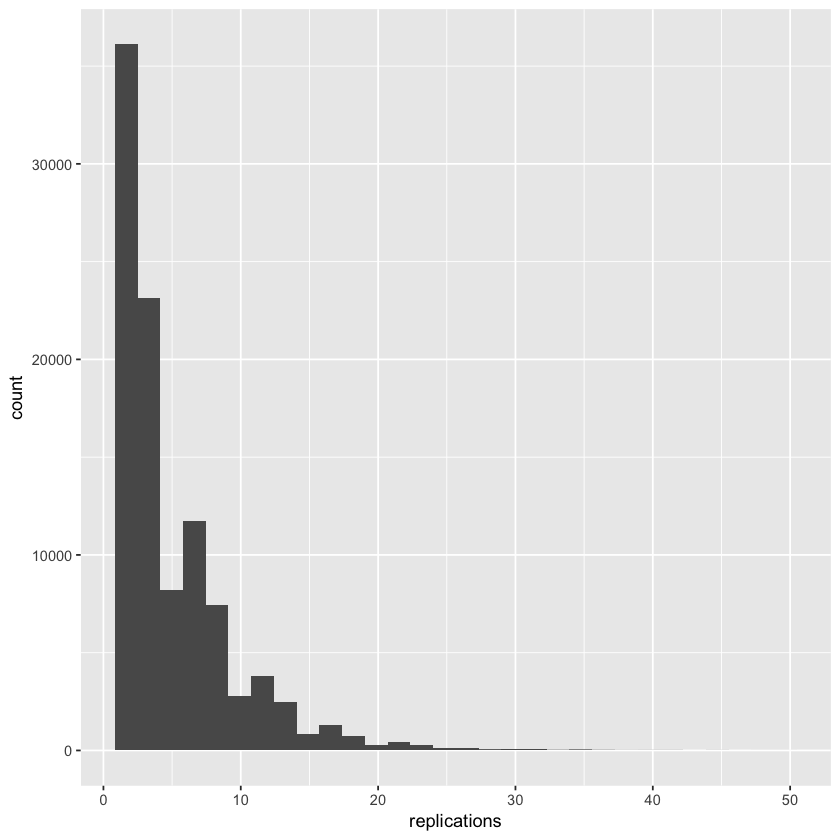

In [40]:
# Simulation
# Existing code for finding the first instance of heads
which(rbinom(100, 1, .2) == 1)[1]

# Replicate this 100,000 times using replicate()
replications <- replicate(100000, which(rbinom(100, 1, .2) == 1)[1])

# Histogram the replications with qplot
qplot(replications)

In [ ]:
# Closed form 
geom_sample <- rgeom(100000, .2)

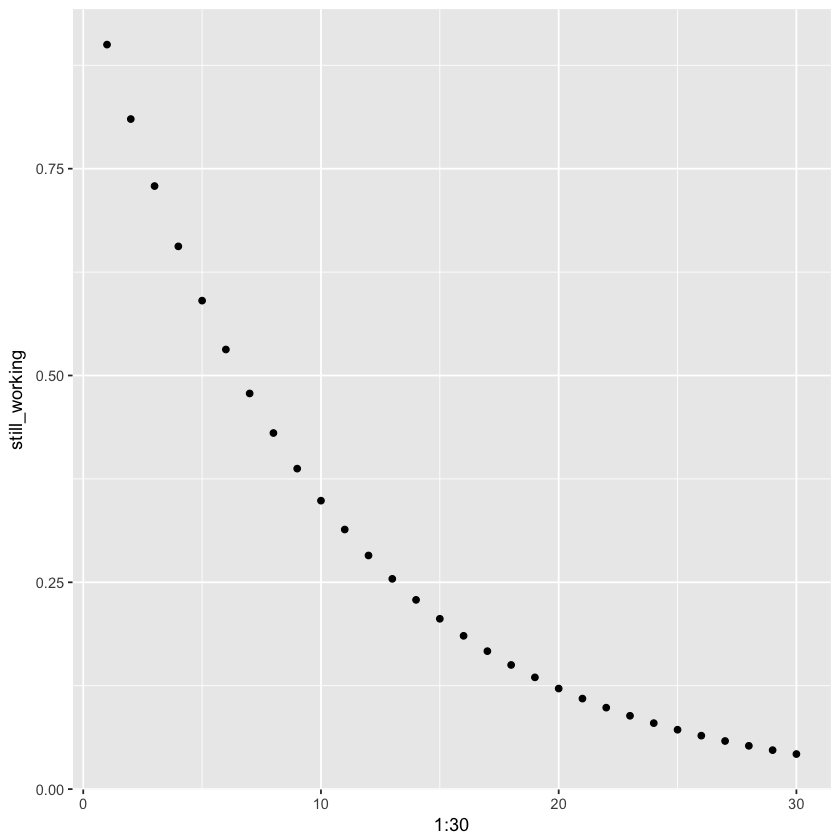

In [41]:
# Calculate the probability of machine working on day 1-30
still_working <- 1 - pgeom(0:29, .1)

# Plot the probability for days 1 to 30
qplot(1:30, still_working)